# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [ ]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [ ]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

In [ ]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

In [ ]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

In [ ]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

In [ ]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [ ]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [2]:
import sys
import pandas as pd
import numpy as np
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 500
init_pose = np.array([0., 0., 0.1, 0., 0., 0.])
target_pos = np.array([0., 0., 10.])
task = Task(init_pose=init_pose, target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode =  500, score = -53.618 (best = -53.574), noise_scale = 3.2555

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.


Epi =    1, score =   0.000 (best =    -inf) in epi 1 simT = 0.360
	total num best epi = 1, total num epi > 1s = 0

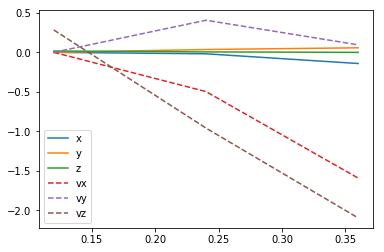

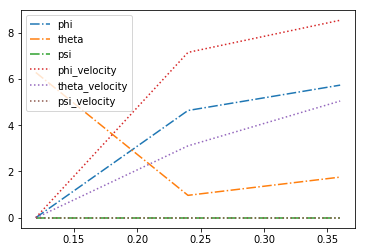

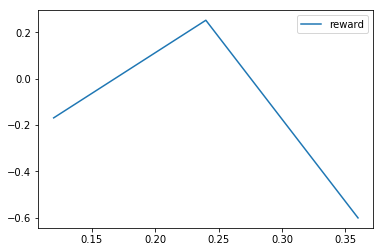


Epi =    2, score =   0.000 (best =    -inf) in epi 1 simT = 0.360
	total num best epi = 1, total num epi > 1s = 0
Epi =    3, score =   0.000 (best =    -inf) in epi 1 simT = 0.360
	total num best epi = 1, total num epi > 1s = 0
Epi =    4, score =   0.000 (best =    -inf) in epi 1 simT = 0.240
	total num best epi = 1, total num epi > 1s = 0
Epi =    5, score =   0.000 (best =    -inf) in epi 1 simT = 0.360
	total num best epi = 1, total num epi > 1s = 0
Epi =    6, score =   0.000 (best =    -inf) in epi 1 simT = 0.360
	total num best epi = 1, total num epi > 1s = 0
Epi =    7, score =   0.000 (best =    -inf) in epi 1 simT = 0.360
	total num best epi = 1, total num epi > 1s = 0
Epi =    8, score =   0.000 (best =    -inf) in epi 1 simT = 0.360
	total num best epi = 1, total num epi > 1s = 0
Epi =    9, score =   0.000 (best =    -inf) in epi 1 simT = 0.360
	total num best epi = 1, total num epi > 1s = 0
Epi =   10, score =   0.000 (best =    -inf) in epi 1 simT = 0.360
	total num b

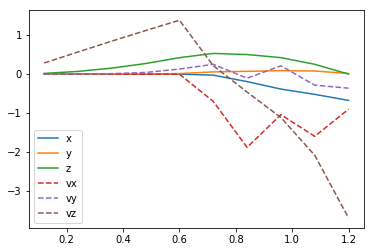

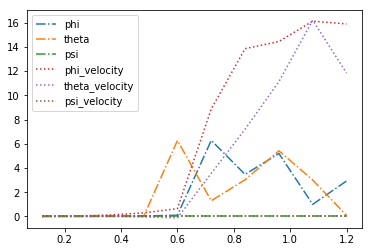

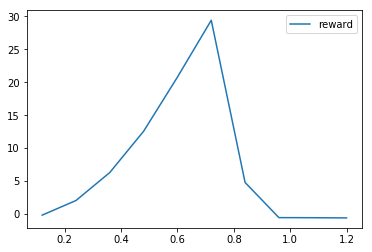


Epi =   22, score =   8.677 (best =  12.378) in epi 22 simT = 1.080
	total num best epi = 3, total num epi > 1s = 2

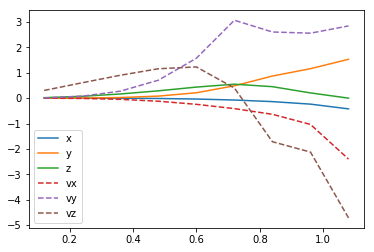

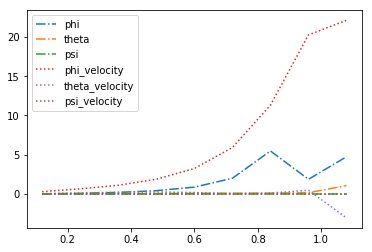

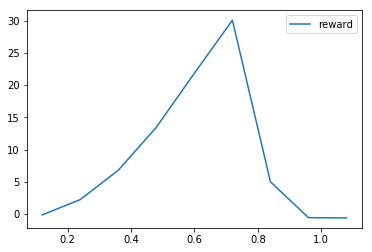


Epi =   23, score =  -0.042 (best =  12.378) in epi 22 simT = 0.360
	total num best epi = 3, total num epi > 1s = 2
Epi =   24, score =   0.039 (best =  12.378) in epi 22 simT = 0.360
	total num best epi = 3, total num epi > 1s = 2
Epi =   25, score =   0.084 (best =  12.378) in epi 22 simT = 0.360
	total num best epi = 3, total num epi > 1s = 2
Epi =   26, score =   2.308 (best =  12.378) in epi 22 simT = 0.600
	total num best epi = 3, total num epi > 1s = 2
Epi =   27, score =   6.370 (best =  12.378) in epi 22 simT = 0.840
	total num best epi = 3, total num epi > 1s = 2
Epi =   28, score =  31.664 (best =  47.803) in epi 28 simT = 1.800
	total num best epi = 4, total num epi > 1s = 3

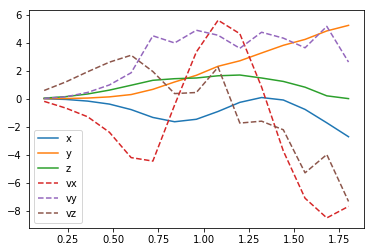

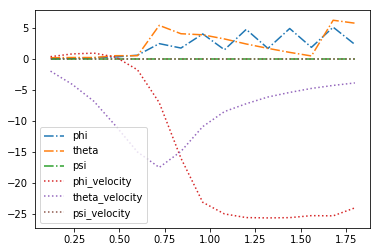

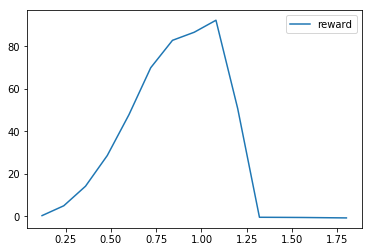


Epi =   29, score =   1.651 (best =  47.803) in epi 28 simT = 0.480
	total num best epi = 4, total num epi > 1s = 3
Epi =   30, score =   1.421 (best =  47.803) in epi 28 simT = 0.600
	total num best epi = 4, total num epi > 1s = 3
Epi =   31, score =   2.026 (best =  47.803) in epi 28 simT = 0.360
	total num best epi = 4, total num epi > 1s = 3
Epi =   32, score =   5.884 (best =  47.803) in epi 28 simT = 0.600
	total num best epi = 4, total num epi > 1s = 3
Epi =   33, score =  26.307 (best = 172.793) in epi 28 simT = 5.040
	total num best epi = 4, total num epi > 1s = 4
Epi =   34, score =  -0.556 (best = 172.793) in epi 28 simT = 0.120
	total num best epi = 4, total num epi > 1s = 4
Epi =   35, score =  -0.543 (best = 172.793) in epi 28 simT = 0.120
	total num best epi = 4, total num epi > 1s = 4
Epi =   36, score =  -0.539 (best = 172.793) in epi 28 simT = 0.120
	total num best epi = 4, total num epi > 1s = 4
Epi =   37, score =  -0.537 (best = 172.793) in epi 28 simT = 0.120
	to

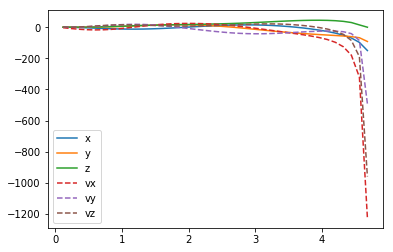

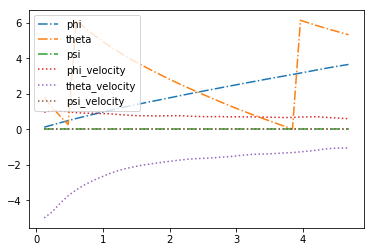

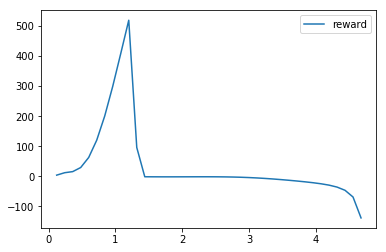


Epi =   82, score =  11.281 (best = 213.018) in epi 81 simT = 4.920
	total num best epi = 5, total num epi > 1s = 6
Epi =   83, score =  65.314 (best = 213.018) in epi 83 simT = 5.040
	total num best epi = 6, total num epi > 1s = 7

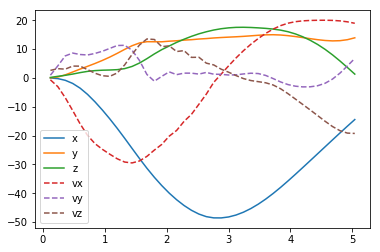

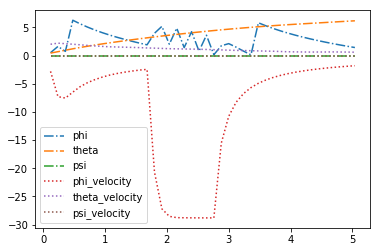

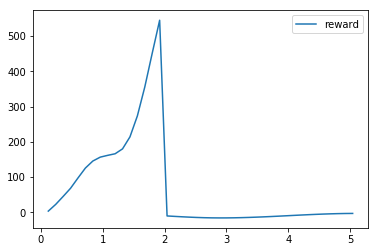


Epi =   84, score = 120.916 (best = 213.018) in epi 84 simT = 2.520
	total num best epi = 7, total num epi > 1s = 8

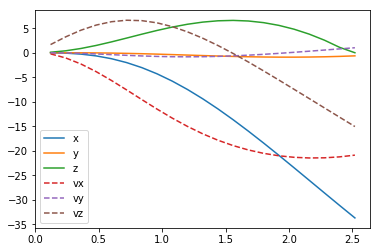

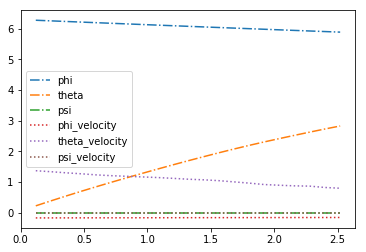

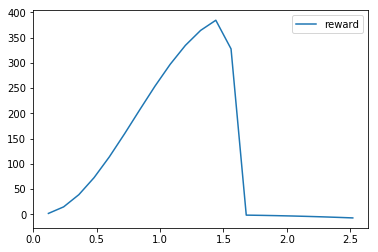


Epi =   85, score =  68.604 (best = 224.329) in epi 84 simT = 4.320
	total num best epi = 7, total num epi > 1s = 9
Epi =   86, score =  50.377 (best = 224.329) in epi 84 simT = 5.040
	total num best epi = 7, total num epi > 1s = 10
Epi =   87, score =  48.377 (best = 224.329) in epi 84 simT = 5.040
	total num best epi = 7, total num epi > 1s = 11
Epi =   88, score =  48.655 (best = 224.329) in epi 84 simT = 5.040
	total num best epi = 7, total num epi > 1s = 12
Epi =   89, score =  49.251 (best = 224.329) in epi 84 simT = 5.040
	total num best epi = 7, total num epi > 1s = 13
Epi =   90, score =  49.921 (best = 224.329) in epi 84 simT = 5.040
	total num best epi = 7, total num epi > 1s = 14
Epi =   91, score =  75.034 (best = 235.924) in epi 84 simT = 4.200
	total num best epi = 7, total num epi > 1s = 15
Epi =   92, score = 144.901 (best = 241.017) in epi 92 simT = 2.760
	total num best epi = 8, total num epi > 1s = 16

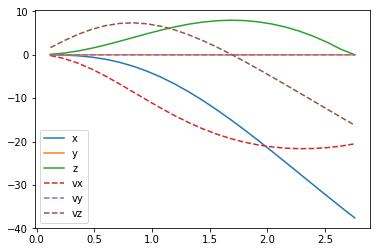

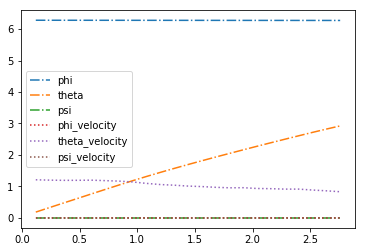

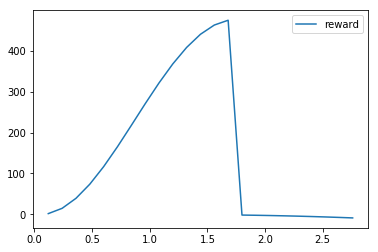


Epi =   93, score =  84.346 (best = 241.017) in epi 92 simT = 1.920
	total num best epi = 8, total num epi > 1s = 17
Epi =   94, score =  46.563 (best = 241.017) in epi 92 simT = 1.560
	total num best epi = 8, total num epi > 1s = 18
Epi =   95, score =  32.700 (best = 241.017) in epi 92 simT = 1.440
	total num best epi = 8, total num epi > 1s = 19
Epi =   96, score =  26.323 (best = 241.017) in epi 92 simT = 1.200
	total num best epi = 8, total num epi > 1s = 20
Epi =   97, score =  22.000 (best = 241.017) in epi 92 simT = 1.200
	total num best epi = 8, total num epi > 1s = 21
Epi =   98, score =  28.855 (best = 241.017) in epi 92 simT = 1.200
	total num best epi = 8, total num epi > 1s = 22
Epi =   99, score =  46.737 (best = 241.017) in epi 92 simT = 1.560
	total num best epi = 8, total num epi > 1s = 23
Epi =  100, score = 104.635 (best = 241.017) in epi 92 simT = 2.280
	total num best epi = 8, total num epi > 1s = 24
Epi =  101, score = 146.997 (best = 244.435) in epi 101 simT = 

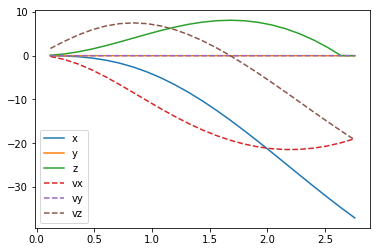

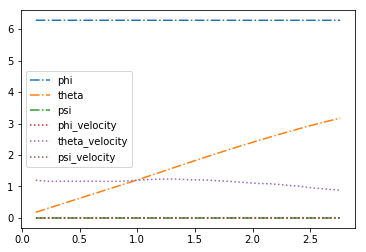

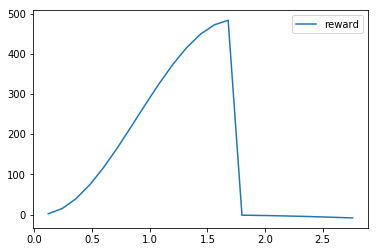


Epi =  102, score = 154.904 (best = 262.011) in epi 102 simT = 3.000
	total num best epi = 10, total num epi > 1s = 26

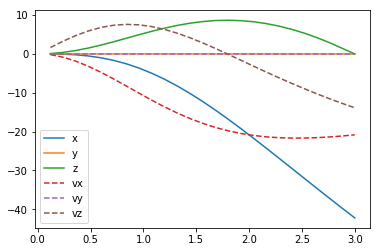

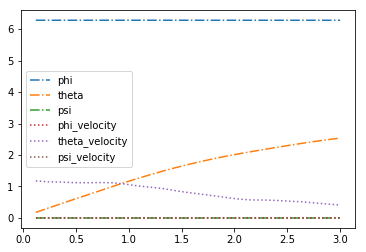

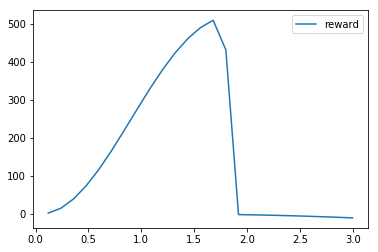


Epi =  103, score =  83.408 (best = 262.011) in epi 102 simT = 3.960
	total num best epi = 10, total num epi > 1s = 27
Epi =  104, score =  51.014 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi > 1s = 28
Epi =  105, score =  48.548 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi > 1s = 29
Epi =  106, score =  46.589 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi > 1s = 30
Epi =  107, score =  46.969 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi > 1s = 31
Epi =  108, score =  47.516 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi > 1s = 32
Epi =  109, score =  47.681 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi > 1s = 33
Epi =  110, score =  47.120 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi > 1s = 34
Epi =  111, score =  47.311 (best = 262.011) in

	total num best epi = 10, total num epi > 1s = 95
Epi =  172, score =  47.848 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi > 1s = 96
Epi =  173, score =  47.934 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi > 1s = 97
Epi =  174, score =  47.662 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi > 1s = 98
Epi =  175, score =  47.833 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi > 1s = 99
Epi =  176, score =  47.737 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi > 1s = 100
Epi =  177, score =  47.732 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi > 1s = 101
Epi =  178, score =  47.707 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi > 1s = 102
Epi =  179, score =  47.877 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi > 1s 

	total num best epi = 10, total num epi > 1s = 163
Epi =  240, score =  47.815 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi > 1s = 164
Epi =  241, score =  47.828 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi > 1s = 165
Epi =  242, score =  47.985 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi > 1s = 166
Epi =  243, score =  47.959 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi > 1s = 167
Epi =  244, score =  47.758 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi > 1s = 168
Epi =  245, score =  47.797 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi > 1s = 169
Epi =  246, score =  47.741 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi > 1s = 170
Epi =  247, score =  47.773 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi 

	total num best epi = 10, total num epi > 1s = 231
Epi =  308, score =  47.769 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi > 1s = 232
Epi =  309, score =  47.935 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi > 1s = 233
Epi =  310, score =  47.789 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi > 1s = 234
Epi =  311, score =  47.805 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi > 1s = 235
Epi =  312, score =  47.781 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi > 1s = 236
Epi =  313, score =  47.755 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi > 1s = 237
Epi =  314, score =  48.137 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi > 1s = 238
Epi =  315, score =  47.851 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi 

	total num best epi = 10, total num epi > 1s = 278
Epi =  376, score =  -1.418 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi > 1s = 279
Epi =  377, score =   8.502 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi > 1s = 280
Epi =  378, score =   6.356 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi > 1s = 281
Epi =  379, score =   8.764 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi > 1s = 282
Epi =  380, score =   4.171 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi > 1s = 283
Epi =  381, score =  53.495 (best = 262.011) in epi 102 simT = 2.880
	total num best epi = 10, total num epi > 1s = 284
Epi =  382, score =  73.345 (best = 262.011) in epi 102 simT = 2.520
	total num best epi = 10, total num epi > 1s = 285
Epi =  383, score =  53.010 (best = 262.011) in epi 102 simT = 3.000
	total num best epi = 10, total num epi 

	total num best epi = 10, total num epi > 1s = 332
Epi =  444, score =  -0.218 (best = 262.011) in epi 102 simT = 0.120
	total num best epi = 10, total num epi > 1s = 332
Epi =  445, score =  -0.227 (best = 262.011) in epi 102 simT = 0.120
	total num best epi = 10, total num epi > 1s = 332
Epi =  446, score =  -0.234 (best = 262.011) in epi 102 simT = 0.120
	total num best epi = 10, total num epi > 1s = 332
Epi =  447, score =  -0.242 (best = 262.011) in epi 102 simT = 0.120
	total num best epi = 10, total num epi > 1s = 332
Epi =  448, score =  -0.428 (best = 262.011) in epi 102 simT = 0.120
	total num best epi = 10, total num epi > 1s = 332
Epi =  449, score =  -0.429 (best = 262.011) in epi 102 simT = 0.120
	total num best epi = 10, total num epi > 1s = 332
Epi =  450, score =  -0.429 (best = 262.011) in epi 102 simT = 0.120
	total num best epi = 10, total num epi > 1s = 332
Epi =  451, score =  -0.430 (best = 262.011) in epi 102 simT = 0.120
	total num best epi = 10, total num epi 

	total num best epi = 10, total num epi > 1s = 332
Epi =  512, score =  -0.402 (best = 262.011) in epi 102 simT = 0.120
	total num best epi = 10, total num epi > 1s = 332
Epi =  513, score =  -0.401 (best = 262.011) in epi 102 simT = 0.120
	total num best epi = 10, total num epi > 1s = 332
Epi =  514, score =  -0.399 (best = 262.011) in epi 102 simT = 0.120
	total num best epi = 10, total num epi > 1s = 332
Epi =  515, score =  -0.397 (best = 262.011) in epi 102 simT = 0.120
	total num best epi = 10, total num epi > 1s = 332
Epi =  516, score =  -0.395 (best = 262.011) in epi 102 simT = 0.120
	total num best epi = 10, total num epi > 1s = 332
Epi =  517, score =  -0.393 (best = 262.011) in epi 102 simT = 0.120
	total num best epi = 10, total num epi > 1s = 332
Epi =  518, score =  -0.391 (best = 262.011) in epi 102 simT = 0.120
	total num best epi = 10, total num epi > 1s = 332
Epi =  519, score =  -0.389 (best = 262.011) in epi 102 simT = 0.120
	total num best epi = 10, total num epi 

	total num best epi = 10, total num epi > 1s = 359
Epi =  580, score =   9.891 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi > 1s = 360
Epi =  581, score =   8.542 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi > 1s = 361
Epi =  582, score =   6.245 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi > 1s = 362
Epi =  583, score = -16.767 (best = 262.011) in epi 102 simT = 4.800
	total num best epi = 10, total num epi > 1s = 363
Epi =  584, score =   8.357 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi > 1s = 364
Epi =  585, score =   9.460 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi > 1s = 365
Epi =  586, score =   8.212 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi > 1s = 366
Epi =  587, score =   8.789 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi 

	total num best epi = 10, total num epi > 1s = 427
Epi =  648, score =   9.520 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi > 1s = 428
Epi =  649, score =   8.306 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi > 1s = 429
Epi =  650, score =   7.961 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi > 1s = 430
Epi =  651, score =   9.131 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi > 1s = 431
Epi =  652, score =  -4.264 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi > 1s = 432
Epi =  653, score =   8.321 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi > 1s = 433
Epi =  654, score =   8.975 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi > 1s = 434
Epi =  655, score =   5.987 (best = 262.011) in epi 102 simT = 5.040
	total num best epi = 10, total num epi 

	total num best epi = 10, total num epi > 1s = 485
Epi =  716, score =   2.584 (best = 262.011) in epi 102 simT = 0.600
	total num best epi = 10, total num epi > 1s = 485
Epi =  717, score =   3.183 (best = 262.011) in epi 102 simT = 0.600
	total num best epi = 10, total num epi > 1s = 485
Epi =  718, score =   2.259 (best = 262.011) in epi 102 simT = 0.600
	total num best epi = 10, total num epi > 1s = 485
Epi =  719, score =   2.262 (best = 262.011) in epi 102 simT = 0.600
	total num best epi = 10, total num epi > 1s = 485
Epi =  720, score =   2.602 (best = 262.011) in epi 102 simT = 0.600
	total num best epi = 10, total num epi > 1s = 485
Epi =  721, score =   2.656 (best = 262.011) in epi 102 simT = 0.600
	total num best epi = 10, total num epi > 1s = 485
Epi =  722, score =   3.016 (best = 262.011) in epi 102 simT = 0.600
	total num best epi = 10, total num epi > 1s = 485
Epi =  723, score =   3.248 (best = 262.011) in epi 102 simT = 0.600
	total num best epi = 10, total num epi 

	total num best epi = 10, total num epi > 1s = 485
Epi =  784, score =  -0.564 (best = 262.011) in epi 102 simT = 0.120
	total num best epi = 10, total num epi > 1s = 485
Epi =  785, score =  -0.564 (best = 262.011) in epi 102 simT = 0.120
	total num best epi = 10, total num epi > 1s = 485
Epi =  786, score =  -0.564 (best = 262.011) in epi 102 simT = 0.120
	total num best epi = 10, total num epi > 1s = 485
Epi =  787, score =  -0.563 (best = 262.011) in epi 102 simT = 0.120
	total num best epi = 10, total num epi > 1s = 485
Epi =  788, score =  -0.563 (best = 262.011) in epi 102 simT = 0.120
	total num best epi = 10, total num epi > 1s = 485
Epi =  789, score =  -0.562 (best = 262.011) in epi 102 simT = 0.120
	total num best epi = 10, total num epi > 1s = 485
Epi =  790, score =  -0.562 (best = 262.011) in epi 102 simT = 0.120
	total num best epi = 10, total num epi > 1s = 485
Epi =  791, score =  -0.562 (best = 262.011) in epi 102 simT = 0.120
	total num best epi = 10, total num epi 

	total num best epi = 10, total num epi > 1s = 485
Epi =  852, score =   2.642 (best = 262.011) in epi 102 simT = 0.600
	total num best epi = 10, total num epi > 1s = 485
Epi =  853, score =   2.237 (best = 262.011) in epi 102 simT = 0.600
	total num best epi = 10, total num epi > 1s = 485
Epi =  854, score =   2.273 (best = 262.011) in epi 102 simT = 0.600
	total num best epi = 10, total num epi > 1s = 485
Epi =  855, score =   2.912 (best = 262.011) in epi 102 simT = 0.480
	total num best epi = 10, total num epi > 1s = 485
Epi =  856, score =   2.996 (best = 262.011) in epi 102 simT = 0.600
	total num best epi = 10, total num epi > 1s = 485
Epi =  857, score =   2.619 (best = 262.011) in epi 102 simT = 0.600
	total num best epi = 10, total num epi > 1s = 485
Epi =  858, score =   2.583 (best = 262.011) in epi 102 simT = 0.600
	total num best epi = 10, total num epi > 1s = 485
Epi =  859, score =   2.959 (best = 262.011) in epi 102 simT = 0.600
	total num best epi = 10, total num epi 

	total num best epi = 10, total num epi > 1s = 485
Epi =  920, score =   3.001 (best = 262.011) in epi 102 simT = 0.600
	total num best epi = 10, total num epi > 1s = 485
Epi =  921, score =   2.673 (best = 262.011) in epi 102 simT = 0.600
	total num best epi = 10, total num epi > 1s = 485
Epi =  922, score =   2.255 (best = 262.011) in epi 102 simT = 0.600
	total num best epi = 10, total num epi > 1s = 485
Epi =  923, score =   3.017 (best = 262.011) in epi 102 simT = 0.600
	total num best epi = 10, total num epi > 1s = 485
Epi =  924, score =   3.118 (best = 262.011) in epi 102 simT = 0.600
	total num best epi = 10, total num epi > 1s = 485
Epi =  925, score =   2.942 (best = 262.011) in epi 102 simT = 0.480
	total num best epi = 10, total num epi > 1s = 485
Epi =  926, score =   3.047 (best = 262.011) in epi 102 simT = 0.600
	total num best epi = 10, total num epi > 1s = 485
Epi =  927, score =   2.948 (best = 262.011) in epi 102 simT = 0.480
	total num best epi = 10, total num epi 

	total num best epi = 10, total num epi > 1s = 485
Epi =  988, score =   2.596 (best = 262.011) in epi 102 simT = 0.600
	total num best epi = 10, total num epi > 1s = 485
Epi =  989, score =   3.037 (best = 262.011) in epi 102 simT = 0.600
	total num best epi = 10, total num epi > 1s = 485
Epi =  990, score =   2.642 (best = 262.011) in epi 102 simT = 0.600
	total num best epi = 10, total num epi > 1s = 485
Epi =  991, score =   3.000 (best = 262.011) in epi 102 simT = 0.600
	total num best epi = 10, total num epi > 1s = 485
Epi =  992, score =   3.006 (best = 262.011) in epi 102 simT = 0.600
	total num best epi = 10, total num epi > 1s = 485
Epi =  993, score =   2.611 (best = 262.011) in epi 102 simT = 0.600
	total num best epi = 10, total num epi > 1s = 485
Epi =  994, score =   2.596 (best = 262.011) in epi 102 simT = 0.600
	total num best epi = 10, total num epi > 1s = 485
Epi =  995, score =   3.057 (best = 262.011) in epi 102 simT = 0.600
	total num best epi = 10, total num epi 

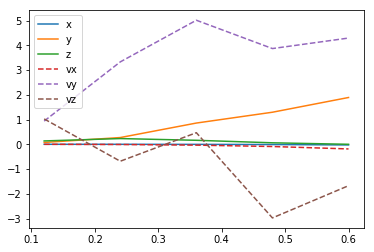

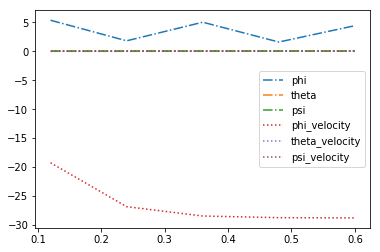

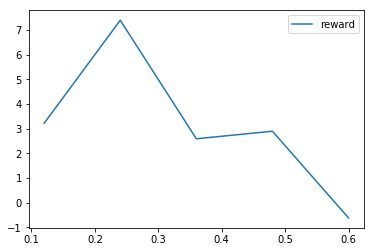

In [4]:
## TODO: Train your agent here.

if 'session' in locals() and session is not None:
    print('Close interactive session')
    session.close()

import tensorflow as tf
#config = tf.ConfigProto()
#gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.7)
#sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.3)
sess = tf.Session(config=tf.ConfigProto(
  allow_soft_placement=True, log_device_placement=True))

## Use this loop as a testing ground, focus on plotting each episode
## in this way we can see how the agent is doing each episode, instead
## of at the end of all episodes, therefore can stop early if no 
## good behavior seems to be happening

import sys
import pandas as pd
import numpy as np
from agents.agent import DDPG
from task import Task

import csv

# Init simulation
# scenario 1, try to go straight up
init_pose = np.array([0., 0., 0.0, 0., 0., 0.])
target_pose = np.array([0., 0., 10.]) #SMM original [0., 0., 10.]
simTime = 5 # default 5, make the sim run longer so the agent has more chance to adapt

# init task (reward structure), and agent
task = Task(init_pose=init_pose, target_pos=target_pose, runtime=simTime)
my_agent = DDPG(task) 

# data fields to save for plotting
import matplotlib.pyplot as plt
%matplotlib inline
labels = ['episode', 'time', 'reward', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
      'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
      'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']


# episode parameters
# count how many times a new best reward is found, as an indication 
# of the quality of the reward function
num_episodes = 1000
best_reward = -np.inf 
best_episode = 0 
numBestEpisode = 0 
numEpisodeGreaterThanASecond = 0

# Run the simulation, and save the results.
showPlotEachEpisode = False
file_output = 'my_agent.txt' # save my results
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    
    for i_episode in range(1, num_episodes+1):
        state = my_agent.reset_episode() # start a new episode
        plotBestEpisode = False

        # gather info for each episode to plot it
        results = {x : [] for x in labels}

        while True:
            # run the 4 rotors at different RPMs
            action = my_agent.act(state) 
            next_state, reward, done = task.step(action)
            my_agent.step(action, reward, next_state, done)
            state = next_state

            # append to results
            to_write = [i_episode] + [task.sim.time] + [reward] + list(task.sim.pose)\
                       + list(task.sim.v) + list(task.sim.angular_v) + list(action)
            for ii in range(len(labels)):
                results[labels[ii]].append(to_write[ii])
            writer.writerow(to_write)

            if done:           
                if my_agent.score > best_reward:
                    best_reward = my_agent.score # this is the critic score after gamma multiply
                    best_episode = i_episode  
                    plotBestEpisode = True
                    numBestEpisode += 1
                
                # if time is greater that 1 seconds, indication of quality (survived)
                if max(results['time']) > 1:
                    numEpisodeGreaterThanASecond += 1

                print("\nEpi = {:4d}, score = {:7.3f} (best = {:7.3f}) in epi {} simT = {:2.3f}\n".format(
                    i_episode, my_agent.score, my_agent.best_score, best_episode, max(results['time'])), end="")   
                print("\ttotal num best epi = {}, total num epi > 1s = {}".format(
                    numBestEpisode, numEpisodeGreaterThanASecond), end="")
               
                # plot last N episodes, until best epi, or show all on
                finalEpiToPlot = 1
                if showPlotEachEpisode or plotBestEpisode or i_episode > num_episodes - finalEpiToPlot:
                    # plot linear info
                    plt.figure(i_episode)
                    plt.plot(results['time'], results['x'], label='x')
                    plt.plot(results['time'], results['y'], label='y')
                    plt.plot(results['time'], results['z'], label='z')
                    plt.plot(results['time'], results['x_velocity'], label='vx', linestyle='--')
                    plt.plot(results['time'], results['y_velocity'], label='vy', linestyle='--')
                    plt.plot(results['time'], results['z_velocity'], label='vz', linestyle='--')  
                    plt.legend()
                    plt.show()  
                    # plot angluar info
                    plt.figure(i_episode + 1 * num_episodes + 1)
                    plt.plot(results['time'], results['phi'], label='phi', linestyle='-.')
                    plt.plot(results['time'], results['theta'], label='theta', linestyle='-.')
                    plt.plot(results['time'], results['psi'], label='psi', linestyle='-.')
                    plt.plot(results['time'], results['phi_velocity'], label='phi_velocity', linestyle=':')
                    plt.plot(results['time'], results['theta_velocity'], label='theta_velocity', linestyle=':')
                    plt.plot(results['time'], results['psi_velocity'], label='psi_velocity', linestyle=':')
                    plt.legend()
                    plt.show() 
                    # plot rewards
                    plt.figure(i_episode + 2 * num_episodes + 1)
                    plt.plot(results['time'], results['reward'], label='reward', linestyle='-')
                    plt.legend()
                    plt.show()  

                break
        sys.stdout.flush()

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

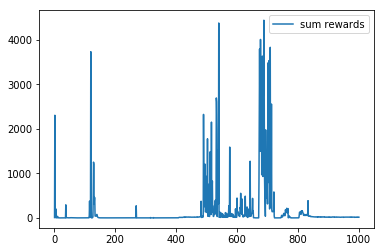

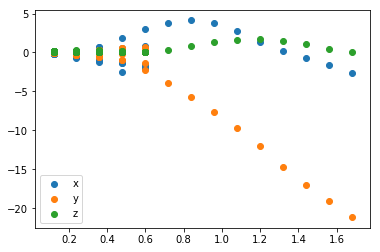

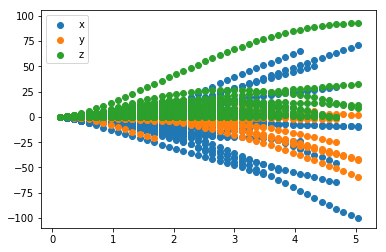

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline

# Load simulation results from the .csv file
savedResults = pd.read_csv('my_agent.txt')

# Total rewards for each episode
episode_rewards = savedResults.groupby(['episode'])[['reward']].sum()
time = savedResults.groupby(['episode'])[['time']]


#print(episode_rewards)
plt.figure(1)
plt.plot(episode_rewards, label='sum rewards')
plt.legend()
plt.show()  

plt.figure(2)
plt.scatter(savedResults['time'][len(episode_rewards)-400:len(episode_rewards)], savedResults['x'][len(episode_rewards)-400:len(episode_rewards)], label='x')
plt.scatter(savedResults['time'][len(episode_rewards)-400:len(episode_rewards)], savedResults['y'][len(episode_rewards)-400:len(episode_rewards)], label='y')
plt.scatter(savedResults['time'][len(episode_rewards)-400:len(episode_rewards)], savedResults['z'][len(episode_rewards)-400:len(episode_rewards)], label='z')
plt.legend()
plt.show()  

plt.figure(3)
plt.scatter(savedResults['time'], savedResults['x'], label='x')
plt.scatter(savedResults['time'], savedResults['y'], label='y')
plt.scatter(savedResults['time'], savedResults['z'], label='z')
plt.legend()
plt.show()  
   

# My References 

1. (CONTINUOUS CONTROL WITH DEEP REINFORCEMENT LEARNING) 
With batch normalization, we were able to learn effectively across many different tasks with differing types of units, without needing to manually ensure the units were within a set range. 
2. Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift
3. DeterministicPolicyGradientAlgorithms
4. SoftActor-Critic: Off-PolicyMaximumEntropyDeepReinforcement LearningwithaStochasticActor



# My Results 

Use the number of best results as an indication of reward architecture and agent architecture performance.

## Case 1

### Rewards

Epi = 2000, score =   0.137 (best =   0.290) in epi 1184, total num best epi 9

**reward going up if the agent is below Z of the goal**
upReward = 0.
if self.sim.pose[2] <  self.target_pos[2] and self.sim.v[2] > 0:
    upReward = 10.0 / abs(self.sim.pose[2] - self.target_pos[2]) 

**action and state space**
self.action_repeat = 6 # (SMM) default 3
self.state_size = self.action_repeat * 6
self.action_low = 000 # (SMM), make this larger than 0 to enforce  all rotors on, default 0 
self.action_high = 900
self.action_size = 4 # (SMM) default 4

**reward survival**
survivalReward = 0.001 * (self.sim.time)

**reward distances (closer than starting position)**
distanceReward = 0
distRewardFactor = 0.003
distanceNow = np.linalg.norm(self.sim.pose[:3] - self.target_pos)   
distanceStarting = np.linalg.norm(self.sim.init_pose[:3] - self.target_pos)
distanceReward = distRewardFactor * (distanceStarting - distanceNow)

distanceNow = abs(self.sim.pose[0] - self.target_pos[0])   
distanceStarting = abs(self.sim.init_pose[0] - self.target_pos[0])
distanceReward += distRewardFactor * (distanceStarting - distanceNow)
distanceNow = abs(self.sim.pose[1] - self.target_pos[1])   
distanceStarting = abs(self.sim.init_pose[1] - self.target_pos[1])
distanceReward += distRewardFactor * (distanceStarting - distanceNow)
distanceNow = abs(self.sim.pose[2] - self.target_pos[2])   
distanceStarting = abs(self.sim.init_pose[2] - self.target_pos[2])
distanceReward += distRewardFactor * (distanceStarting - distanceNow)

**compute final reward**
reward = distanceReward + upReward + survivalReward

**agent settings**
self.exploration_mu = 0 # original 0
self.exploration_theta = 0.2 # 0.01 seems to not suck # original 0.15
self.exploration_sigma = 0.3 # 0.01 seems to not suck # oringal 0.2
self.noise = OUNoise(self.action_size, self.exploration_mu, self.exploration_theta, self.exploration_sigma)
    
self.buffer_size = 100000
self.batch_size = 64 # (SMM) default 64, might watch to use a bigger batch, esp with batch norm
self.memory = ReplayBuffer(self.buffer_size, self.batch_size)
    
self.gamma = 0.999 # (SMM) 0.99  # discount factor, critic learning rate
self.tau = 0.001 # (SMM) 0.01  # for soft update of target parameters

## Case 2: Case 1 + batch norm + less up reward

**reward going up if the agent is below Z of the goal**
upReward = 0.
if self.sim.pose[2] <  self.target_pos[2] and self.sim.v[2] > 0:
    upReward = 1.0 / abs(self.sim.pose[2] - self.target_pos[2])


## Case 3: Case 2 + more dist reward factor

Epi = 2000, score =   0.200 (best =   2.362) in epi 1192, total num best epi 9

distRewardFactor = 0.05

## Case 4: Case 3 + cap on up reward

doesnt seem so good

upReward = min(1, 1.0 / abs(self.sim.pose[2] - self.target_pos[2]))

## Case 4: only reward is z velocity based

Epi = 2000, score =   0.100 (best =   1.175) in epi 337, total num best epi 4

upReward = 0.
if self.sim.pose[2] < self.target_pos[2] and self.sim.v[2] > 0:
    upReward = 10.0 / abs(self.sim.pose[2] - self.target_pos[2])
elif self.sim.pose[2] > self.target_pos[2] and self.sim.v[2] < 0:
    upReward = 10.0 / abs(self.sim.pose[2] - self.target_pos[2])

## Case 5: velocity based in xyz like up reward

seems promising, but too coarse

Epi = 2000, score =   6.000 (best =  14.200) in epi 1176, total num best epi 5

**reward going up if the agent is below Z of the goal**


upReward = 0.
if self.sim.pose[2] < self.target_pos[2] and self.sim.v[2] > 0:
    upReward = 1.0# / abs(self.sim.pose[2] - self.target_pos[2])
elif self.sim.pose[2] > self.target_pos[2] and self.sim.v[2] < 0:
    upReward = 1.0# / abs(self.sim.pose[2] - self.target_pos[2])

xReward = 0
if self.sim.pose[0] < self.target_pos[0] and self.sim.v[0] > 0:
    xReward = 1.0# / abs(self.sim.pose[0] - self.target_pos[0])
elif self.sim.pose[0] > self.target_pos[0] and self.sim.v[0] < 0:
    xReward = 1.0# / abs(self.sim.pose[0] - self.target_pos[0])

yReward = 0
if self.sim.pose[0] < self.target_pos[1] and self.sim.v[1] > 0:
    yReward = 1.0# / abs(self.sim.pose[1] - self.target_pos[1])
elif self.sim.pose[0] > self.target_pos[1] and self.sim.v[1] < 0:
    yReward = 1.0# / abs(self.sim.pose[1] - self.target_pos[1])

## Case 6: 5 + distance reward

Epi = 2000, score =   5.000 (best =  14.000) in epi 1905, total num best epi 8

distanceReward = 0
distRewardFactor = 0.01
distanceNow = np.linalg.norm(self.sim.pose[:3] - self.target_pos)   
distanceStarting = np.linalg.norm(self.sim.init_pose[:3] - self.target_pos)
distanceReward = distRewardFactor * (distanceStarting - distanceNow)

## Case 6: simplier height reward

Epi = 1000, score =   0.328 (best =  24.143) in epi 303
	total num best epi = 13, total num epi > 1s = 479

should reward hovering, as that should be the max reward point for height
if self.sim.pose[2] < self.target_pos[2]:
    upReward = 1 * (self.sim.pose[2] / self.target_pos[2]) # percentage of height
else:
    upReward = 1 * (self.target_pos[2] / self.sim.pose[2]) # percentage of height

distanceReward = 0
distRewardFactor = 0.0001
distanceNow = np.linalg.norm(self.sim.pose[:3] - self.target_pos)   
distanceStarting = np.linalg.norm(self.sim.init_pose[:3] - self.target_pos)
distanceReward = distRewardFactor * np.power((distanceStarting - distanceNow), 1)

distanceNow = abs(self.sim.pose[0] - self.target_pos[0])   
distanceStarting = abs(self.sim.init_pose[0] - self.target_pos[0])
distanceReward += distRewardFactor * (distanceStarting - distanceNow)
distanceNow = abs(self.sim.pose[1] - self.target_pos[1])   
distanceStarting = abs(self.sim.init_pose[1] - self.target_pos[1])
distanceReward += distRewardFactor * (distanceStarting - distanceNow)
distanceNow = abs(self.sim.pose[2] - self.target_pos[2])   
distanceStarting = abs(self.sim.init_pose[2] - self.target_pos[2])
distanceReward += distRewardFactor * (distanceStarting - distanceNow)

reward = distanceReward + upReward

## Case 7: 6 + batch norm (agent/critic), simple dist reward

Epi = 1000, score =   0.086 (best =   3.855) in epi 204
	total num best epi = 17, total num epi > 1s = 52

if self.sim.pose[2] < self.target_pos[2]:
    upReward = 10 * (self.sim.pose[2] / self.target_pos[2]) # percentage of height remaining
else:
    upReward = 10 * (self.target_pos[2] / self.sim.pose[2]) # percentage of height remaining

distanceReward = -np.linalg.norm(self.sim.pose[:3] - self.target_pos);

reward = distanceReward + upReward

self.batch_size = 32 # (SMM) default 64, might watch to use a bigger batch, esp with batch norm

## Case 8: 7 + constant up reward, speed penalty, tuned distance penalty

Epi = 1000, score =   0.049 (best =   3.674) in epi 151
	total num best epi = 12, total num epi > 1s = 131

    # reward going up if the agent is below Z of the goal
    # should reward hovering, as that should be the max reward point for height
    upReward = 1. # give some reward for surviving at all
    if self.sim.pose[2] < self.target_pos[2]:
        upReward += 5 * (self.sim.pose[2] / self.target_pos[2]) # percentage of height remaining
    else:
        upReward += 5 * (self.target_pos[2] / self.sim.pose[2]) # percentage of height remaining

    distanceReward = -0.001 * np.pow(np.linalg.norm(self.sim.pose[:3] - self.target_pos), 2.);

    # penalize large linear velocities
    speedReward = - 0.001 * np.power(self.sim.v[0], 2.)
    speedReward += - 0.001 * np.power(self.sim.v[1], 2.)
    speedReward += - 0.001 * np.power(self.sim.v[2], 2.)

    # compute final reward
    reward = upReward + distanceReward + speedReward
    
## Case 9: 8 + more noise

seemed too unstable

    self.exploration_theta = 0.5 # 0.01 seems to not suck # original 0.15
    self.exploration_sigma = 50. # 0.01 seems to not suck # oringal 0.2

## Case 10: 8 + less noise

Epi = 1000, score =   1.412 (best =   3.563) in epi 274
	total num best epi = 4, total num epi > 1s = 735

    self.exploration_theta = 0.15 # 0.01 seems to not suck # original 0.15
    self.exploration_sigma = 0.2 # 0.01 seems to not suck # oringal 0.2

## Case 11: 10 + penality for velocity above 5mps

Epi = 1000, score =   5.405 (best =  28.613) in epi 332
	total num best epi = 7, total num epi > 1s = 22

    # penalize large linear velocities
    speedReward = 0
    if(abs(self.sim.v[0]) > 5):
        speedReward += -0.001 * np.power(self.sim.v[0], 1.)
    if(abs(self.sim.v[1]) > 5):
        speedReward += -0.001 * np.power(self.sim.v[1], 1.)
    if(abs(self.sim.v[1]) > 5):
        speedReward += -0.001 * np.power(self.sim.v[2], 1.)

## case 12: const up and variable dist reward only

reward func seems more continuous, easier to understand to agent it seems

Epi = 1000, score =   5.421 (best =   5.821) in epi 891 simT = 0.840
	total num best epi = 11, total num epi > 1s = 103

    upReward = 1. # give some reward for surviving at all
    distanceReward = -0.001 * np.power(np.linalg.norm(self.sim.pose[:3] - self.target_pos), 2.);


## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: